IMPORT DIFFERENT MODULES

In [3]:
import numpy as np#load ice cube data
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt

LOAD THE FILES WHICH HAVE DETAILS INCLUDING RA,DEC,ANG_ERROR,ETC

In [4]:
files=["IC40_exp_new.csv","IC59_exp_new.csv","IC79_exp_new.csv","IC86_I_exp_new.csv","IC86_II_exp_new.csv", 
       "IC86_III_exp_new.csv","IC86_IV_exp_new.csv","IC86_V_exp_new.csv","IC86_VI_exp_new.csv",
       "IC86_VII_exp_new.csv"]

In [5]:
data=np.loadtxt("IC40_exp_new.csv")#loading the first file
for name in files[1:]:#indexing the list
    da=np.loadtxt(name)
    data=np.vstack((data,da))#load everyfile
mjd,log10_E,Ang_err,RA,Dec,Azim,Zenith=data.T
len(RA)
    

1134431

In [29]:
fields=[log10_E,RA,Dec,Ang_err]#load different columns
print(Ang_err)
iceang=fields[3]

[0.48 0.62 0.56 ... 0.3  0.21 0.25]


In [30]:
print(fields)

[array([3.31, 5.17, 3.92, ..., 2.88, 2.98, 3.28]), array([203.024,  75.024,  97.501, ..., 308.127, 332.199, 213.309]), array([ 16.76 , -13.371,  11.29 , ...,  42.543,  44.72 ,   4.708]), array([0.48, 0.62, 0.56, ..., 0.3 , 0.21, 0.25])]


In [31]:
df=pd.read_csv("TabO1.csv")#ADDING EXTRA MAGNETARS WHICH ARE EXTRA GALACTIC
#print(df)
df.loc[31, 'RA'] = '08 43 00.0'
df.loc[31, 'Decl'] = '+73 30 00'
df.loc[32, 'RA'] = '00 47 30.0'
df.loc[32, 'Decl'] = '-25 11 37 '
df.loc[33,'RA']='09 52 34.1'
df.loc[33,'Decl']='+68 50 42'
df.loc[34,'RA']='00 44 18.0'
df.loc[34,'Decl']='+42 18 00'
df.loc[35,'RA']='13 42 06.24'
df.loc[35,'Decl']='-26 53 48.1'
df.loc[36,'RA']='00 49 12.0 '
df.loc[36,'Decl']='-26 06 00  '

df.to_csv("updated_file.csv", index=False)
print(df)

#df.loc[1, 'RA'] = '09 55 59.28'
#df.loc[1, 'Decl'] = '+69 41 02.40'


                     Name     Period    Period_Err Pdot_lim          Pdot  \
0   CXOU J010043.1-721134   8.020392  9.000000e-06      NaN  1.880000e-11   
1              4U 0142+61   8.688692  5.000000e-08      NaN  2.022000e-12   
2           SGR 0418+5729   9.078388  5.000000e-08      NaN  4.000000e-15   
3           SGR 0501+4516   5.762069  1.000000e-07      NaN  5.940000e-12   
4             SGR 0526-66   8.054400  2.000000e-04      NaN  3.800000e-11   
5          1E 1048.1-5937   6.457875  3.000000e-06      NaN  2.250000e-11   
6          1E 1547.0-5408   2.072125  1.000000e-07      NaN  4.770000e-11   
7          PSR J1622-4950   4.326100  1.000000e-04      NaN  1.700000e-11   
8             SGR 1627-41   2.594578  6.000000e-06      NaN  1.900000e-11   
9   CXOU J164710.2-455216  10.610644  1.700000e-05        <  4.000000e-13   
10  1RXS J170849.0-400910  11.005025  1.700000e-07      NaN  1.945500e-11   
11  CXOU J171405.7-381031   3.825352  4.000000e-06      NaN  6.400000e-11   

In [32]:
df1=df.rename({'RA':'RA_M'},axis=1)
print(df1)

                     Name     Period    Period_Err Pdot_lim          Pdot  \
0   CXOU J010043.1-721134   8.020392  9.000000e-06      NaN  1.880000e-11   
1              4U 0142+61   8.688692  5.000000e-08      NaN  2.022000e-12   
2           SGR 0418+5729   9.078388  5.000000e-08      NaN  4.000000e-15   
3           SGR 0501+4516   5.762069  1.000000e-07      NaN  5.940000e-12   
4             SGR 0526-66   8.054400  2.000000e-04      NaN  3.800000e-11   
5          1E 1048.1-5937   6.457875  3.000000e-06      NaN  2.250000e-11   
6          1E 1547.0-5408   2.072125  1.000000e-07      NaN  4.770000e-11   
7          PSR J1622-4950   4.326100  1.000000e-04      NaN  1.700000e-11   
8             SGR 1627-41   2.594578  6.000000e-06      NaN  1.900000e-11   
9   CXOU J164710.2-455216  10.610644  1.700000e-05        <  4.000000e-13   
10  1RXS J170849.0-400910  11.005025  1.700000e-07      NaN  1.945500e-11   
11  CXOU J171405.7-381031   3.825352  4.000000e-06      NaN  6.400000e-11   

In [33]:
import re
def convert_ra_to_comma(ra):#replacing space with comma
    return re.sub(r"\s+", ",",ra.strip())
df1['RA_M_comma'] = df1['RA_M'].apply(convert_ra_to_comma)# Apply the function to the entire RA_M column
def convert_dec_to_comma(dec):
    return re.sub(r"\s+", ",",dec.strip())
df1['dec_M_comma'] = df1['Decl'].apply(convert_dec_to_comma)
    
print(df1[['Name', 'RA_M', 'RA_M_comma', 'Decl','dec_M_comma']])# Show the DataFrame with the new RA_M_Comma column

                     Name            RA_M      RA_M_comma            Decl  \
0   CXOU J010043.1-721134     01 00 43.14     01,00,43.14     -72 11 33.8   
1              4U 0142+61    01 46 22.407    01,46,22.407    +61 45 03.19   
2           SGR 0418+5729    04 18 33.867    04,18,33.867    +57 32 22.91   
3           SGR 0501+4516     05 01 06.76     05,01,06.76    +45 16 33.92   
4             SGR 0526-66     05 26 00.89     05,26,00.89     -66 04 36.3   
5          1E 1048.1-5937     10 50 07.14     10,50,07.14     -59 53 21.4   
6          1E 1547.0-5408  15 50 54.12386  15,50,54.12386  -54 18 24.1141   
7          PSR J1622-4950     16 22 44.89     16,22,44.89     -49 50 52.7   
8             SGR 1627-41    16 35 51.844    16,35,51.844    -47 35 23.31   
9   CXOU J164710.2-455216     16 47 10.20     16,47,10.20    -45 52 16.90   
10  1RXS J170849.0-400910     17 08 46.87     17,08,46.87    -40 08 52.44   
11  CXOU J171405.7-381031     17 14 05.74     17,14,05.74     -38 10 30.9   

In [34]:
def ra_to_degrees(ra_string):
    ra_parts = ra_string.split(',')
    ra_hours = int(ra_parts[0])  # Convert to integer (handles leading zeros)
    ra_minutes = int(ra_parts[1])  # Convert to integer (handles leading zeros)
    ra_seconds = float(ra_parts[2])  # Convert to float
    return (ra_hours * 15) + (ra_minutes / 4) + (ra_seconds / 240)
#field3.loc[:,'RA_M(deg)']=field3['RA_M_comma'].apply(ra_to_degrees)
def dec_to_degrees(dec_string):
    dec_parts = dec_string.split(',')
    dec_degrees = int(dec_parts[0])  # Convert to integer (handles leading zeros)
    dec_minutes = int(dec_parts[1])  # Convert to integer (handles leading zeros)
    dec_seconds = float(dec_parts[2])
    sign = 1 if dec_degrees >= 0 else -1
    return abs(dec_degrees) + (dec_minutes / 60) + (dec_seconds / 3600) * sign
df1['RA_M(deg)'] = df1['RA_M_comma'].apply(ra_to_degrees)
df1['Decl_M(deg)'] = df1['dec_M_comma'].apply(dec_to_degrees)
print(df1)

                     Name     Period    Period_Err Pdot_lim          Pdot  \
0   CXOU J010043.1-721134   8.020392  9.000000e-06      NaN  1.880000e-11   
1              4U 0142+61   8.688692  5.000000e-08      NaN  2.022000e-12   
2           SGR 0418+5729   9.078388  5.000000e-08      NaN  4.000000e-15   
3           SGR 0501+4516   5.762069  1.000000e-07      NaN  5.940000e-12   
4             SGR 0526-66   8.054400  2.000000e-04      NaN  3.800000e-11   
5          1E 1048.1-5937   6.457875  3.000000e-06      NaN  2.250000e-11   
6          1E 1547.0-5408   2.072125  1.000000e-07      NaN  4.770000e-11   
7          PSR J1622-4950   4.326100  1.000000e-04      NaN  1.700000e-11   
8             SGR 1627-41   2.594578  6.000000e-06      NaN  1.900000e-11   
9   CXOU J164710.2-455216  10.610644  1.700000e-05        <  4.000000e-13   
10  1RXS J170849.0-400910  11.005025  1.700000e-07      NaN  1.945500e-11   
11  CXOU J171405.7-381031   3.825352  4.000000e-06      NaN  6.400000e-11   

[37 rows x 51 columns]


In [35]:
df1.at[32, 'Decl_M(deg)'] =- 25.02
df1.at[15, 'Decl_M(deg)'] = 16.11
df1.at[35, 'Decl_M(deg)'] =- 26.87 
df1.at[36, 'Decl_M(deg)'] = -26.10
field3 = df1[['RA_M(deg)', 'Decl_M(deg)']]
print(field3)


     RA_M(deg)  Decl_M(deg)
0    15.179750    72.173944
1    26.593363    61.750886
2    64.641113    57.539697
3    75.278167    45.276089
4    81.503708    66.056583
5   162.529750    59.877389
6   237.725516    54.293302
7   245.687042    49.818694
8   248.966017    47.576858
9   251.792500    45.861972
10  257.195292    40.118767
11  258.523917    38.158083
12  266.417350    28.991717
13  272.163904    20.388931
14  272.462862    19.702241
15  274.515417    16.110000
16  275.575000    16.059222
17  278.434875     8.514583
18  278.717158     8.734439
19  280.330596     4.930233
20  283.194458     0.554944
21  286.809708     9.322250
22  293.731657    21.896607
23  345.284562    58.879014
24  118.927000    29.536333
25  270.245833    22.920000
26  272.046667    20.619722
27  274.714083    15.977050
28  281.227833     2.918583
29  303.487083    34.330000
30  281.603917     2.958306
31  130.750000    73.500000
32   11.875000   -25.020000
33  148.142083    68.845000
34   11.075000    42

In [36]:
ra_mag=np.array(field3['RA_M(deg)'])
dec_mag=np.array(field3['Decl_M(deg)'])
ice_ra=(fields[1])
ice_dec=(fields[2])
print(ice_ra)
print(ice_dec)
print(ra_mag)
#print(dec_mag)|
print(dec_mag)

[203.024  75.024  97.501 ... 308.127 332.199 213.309]
[ 16.76  -13.371  11.29  ...  42.543  44.72    4.708]
[ 15.17975     26.5933625   64.6411125   75.27816667  81.50370833
 162.52975    237.72551608 245.68704167 248.96601667 251.7925
 257.19529167 258.52391667 266.41735    272.16390417 272.46286233
 274.51541667 275.575      278.434875   278.71715833 280.33059583
 283.19445833 286.80970833 293.7316575  345.2845625  118.927
 270.24583333 272.04666667 274.71408333 281.22783333 303.48708333
 281.60391667 130.75        11.875      148.14208333  11.075
 205.526       12.3       ]
[ 72.17394444  61.75088611  57.53969722  45.27608889  66.05658333
  59.87738889  54.29330164  49.81869444  47.57685833  45.86197222
  40.11876667  38.15808333  28.99171722  20.38893056  19.70224125
  16.11        16.05922222   8.51458333   8.73443889   4.93023333
   0.55494444   9.32225     21.89660733  58.87901389  29.53633333
  22.92        20.61972222  15.97705      2.91858333  34.33
   2.95830556  73.5       

0|22738|9.43847939050835|1.0523187662932771
1|39319|0.0|0.0
2|45708|0.9615483493566143|0.01123917113608569
3|64126|0.0|0.0
4|32471|3.086109116722338|0.1538654439628217
5|42017|0.0|0.0
6|50549|0.9541914687753277|0.0085448853302468
7|57201|1.621776647246917|0.021551272829994764
8|60464|0.0|0.0
9|63132|4.753586875391622|0.17580119156020454
10|72781|3.2122478875360505|0.09020780851814136
11|76436|0.0|0.0
12|96753|2.44279199586673|0.09260909312073956
13|118969|0.0|0.0
14|120645|0.0|0.0
15|130797|0.0|0.0
16|130973|19.62607324455929|2.6198861823511765
17|158408|0.0|0.0
18|157598|0.0|0.0
19|169627|7.431246309318869|0.47444000440010714
20|152716|23.215745741234215|3.347183915447687
21|155208|15.997306486910924|1.7243268603464692
22|114685|17.29099153786294|2.476163737490345
23|43588|0.8032496158871378|0.004725684050715075
24|95329|17.065796166333588|2.6921773615350215
25|112050|8.142756018031054|0.8053808420666492
26|118306|0.0|0.0
27|131250|0.0|0.0
28|167627|0.0|0.0
29|84186|0.0|0.0
30|167752|

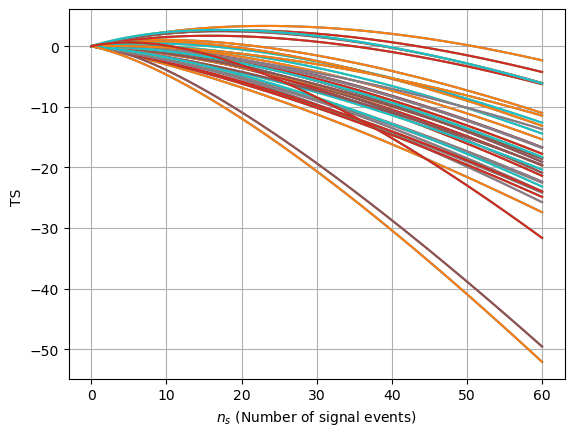

In [37]:
for i in range(0,37):
    ra_mag0=ra_mag[i]
    dec_mag0=dec_mag[i]
    ra_mag1=np.radians(ra_mag0)
    dec_mag1=np.radians(dec_mag0)
    ice_ra1=np.radians(ice_ra)
    ice_dec1=np.radians(ice_dec)
    RA_diff=(ice_ra1-ra_mag1)
    Ang_sep=np.arccos(np.sin(ice_dec1)*np.sin(dec_mag1)+np.cos(ice_dec1)*np.cos(dec_mag1)*np.cos(RA_diff))
    def sig( declcut):#SIGNAL
        decdiff=np.abs(ice_dec-dec_mag0)
        nuind=np.nonzero(decdiff < declcut)
        sg=np.radians(iceang[nuind])**2
        Ang_sep1=(np.arccos((np.sin(ice_dec1[nuind])*np.sin(dec_mag1)+np.cos(ice_dec1[nuind])*np.cos(dec_mag1)*np.cos(ice_ra1[nuind]-ra_mag1))))**2
        return ((np.exp(-1*Ang_sep1/(2*sg)))/(2*np.pi*sg))
    def bgs(band, twopi = True):#BACKGROUND
        if twopi == True:
            s_ang = (np.sin(np.radians(dec_mag0 + band)) - np.sin(np.radians(dec_mag0 - band)))*(2 * np.pi)
            return 1/s_ang
        else:
            s_ang = (np.sin(np.deg2rad(dec_mag0 + band)) - np.sin(np.deg2rad(dec_mag0- band)))
            return 1/s_ang
    def P(x,N,S,B):#LIKELYHOOD
        nsN=x/N
        return nsN*S+(1-nsN)*B
    def TS(x,N,S,B):
        return 2*np.sum(np.log((P(x,N,S,B)/B)))
    declcut=5
    band=5
    B=bgs(band,twopi=True)
    S =(sig(declcut)) 
    decdiff=np.abs(ice_dec-dec_mag0)
    nuind=np.nonzero(decdiff < declcut)
    N=len(nuind[0])
    def ns_for_TSmax(S, B, N):
        declcut=5
        band=5
        B=bgs(band,twopi=True)
        S =(sig(declcut)) 
        nll = lambda x: -TS(x,N,S,B)
        soln = minimize(nll,6,bounds=((0,None),))
        ns = float(soln.x)
        return ns
    ns1=ns_for_TSmax(S, B, N)
    print(i,N,ns1,TS(ns1,N,S,B),sep="|")
    ns_v=np.linspace(0,60, 100)
    TS_values =( [TS(x, N, S, B) for x in ns_v])
    plt.plot( ns_v,TS_values)
    plt.plot(ns_v,TS_values)
#plt.text(x=3.5, y=5, s="V388 Cas", fontsize=12, color='black')
    plt.xlabel(r'$n_s$ (Number of signal events)')
    plt.ylabel('TS ')
    plt.grid(True)

In [38]:
for x in np.arange(25,27, 0.1):#FINDING UPPER LIMIT FOR TS-TS_max=-2.7
    print(x,TS(x,N,S,B))

25.0 -5.573767613902583
25.1 -5.62702187847174
25.200000000000003 -5.680441558742981
25.300000000000004 -5.734026091447468
25.400000000000006 -5.787774916562398
25.500000000000007 -5.841687477432663
25.60000000000001 -5.895763220692299
25.70000000000001 -5.950001596186812
25.80000000000001 -6.004402057095172
25.900000000000013 -6.058964059634647
26.000000000000014 -6.113687063352334
26.100000000000016 -6.168570530913492
26.200000000000017 -6.223613928058983
26.30000000000002 -6.27881672369517
26.40000000000002 -6.334178389768897
26.50000000000002 -6.389698401189202
26.600000000000023 -6.445376236123645
26.700000000000024 -6.501211375450456
26.800000000000026 -6.5572033032215336
26.900000000000027 -6.613351506336109


In [39]:
declcut=5
decdiff=np.abs(ice_dec-dec_mag0)
nuind=np.nonzero(decdiff < declcut)
N=len(nuind[0])
N1=len(ice_ra)
print(N)
print(N1)

76071
1134431
